In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Dataset

In [3]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)

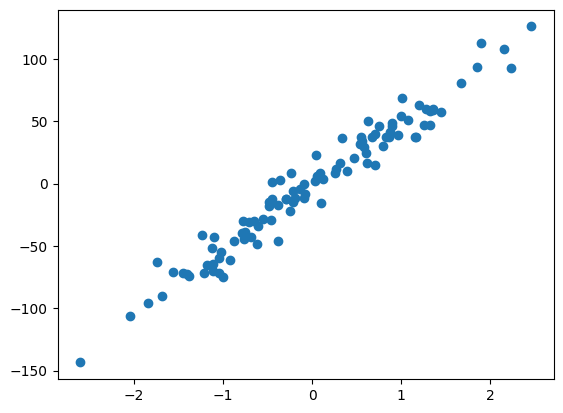

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [6]:
X = np.hstack((x,np.ones(x.shape)))
print(X)

[[ 0.5487074   1.        ]
 [-0.2204675   1.        ]
 [ 0.70975826  1.        ]
 [-1.12685693  1.        ]
 [ 0.62183611  1.        ]
 [ 0.53882982  1.        ]
 [-0.4816858   1.        ]
 [-0.09035689  1.        ]
 [-0.60433939  1.        ]
 [-0.99885941  1.        ]
 [-0.65501515  1.        ]
 [ 0.67318385  1.        ]
 [-1.56281668  1.        ]
 [ 1.4470807   1.        ]
 [ 1.84798958  1.        ]
 [ 1.1936372   1.        ]
 [ 0.62003142  1.        ]
 [-0.87740709  1.        ]
 [ 1.16622171  1.        ]
 [-1.23662861  1.        ]
 [-0.2197155   1.        ]
 [ 0.32960046  1.        ]
 [ 1.31759745  1.        ]
 [-0.55428322  1.        ]
 [-1.0233875   1.        ]
 [ 2.45695339  1.        ]
 [ 1.89509953  1.        ]
 [ 0.85869549  1.        ]
 [-1.04035931  1.        ]
 [ 0.09468542  1.        ]
 [-0.37873274  1.        ]
 [-2.04135113  1.        ]
 [ 0.89303496  1.        ]
 [ 0.96119134  1.        ]
 [-0.29752514  1.        ]
 [-0.75927137  1.        ]
 [-0.45144902  1.        ]
 

In [7]:
theta = np.random.rand(2,1)

# Modèle

In [8]:
def model(X,theta):
    return X.dot(theta)

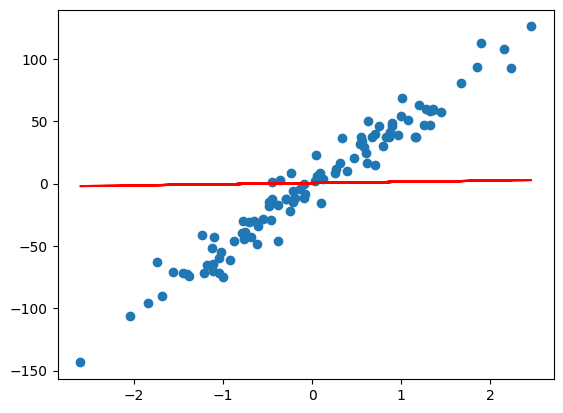

In [9]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), c='r')
plt.show()

# Fonction coût

In [10]:
def cost_function(X,y,theta):
    m = len(y)
    return 1 / (2*m) * np.sum((model(X,theta)-y)**2)

In [11]:
cost_function(X,y,theta)

1311.5120754106888

# Gradients et descente de gradient

In [12]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [13]:
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

# Machine learning

In [41]:
theta_final, cost_history = gradient_descent(X,y,theta, 0.001 ,100)

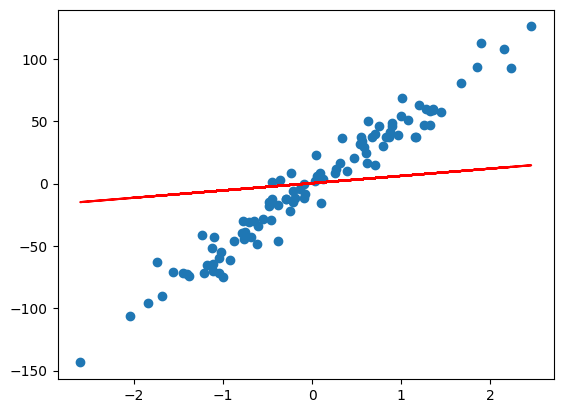

In [42]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')
plt.show()

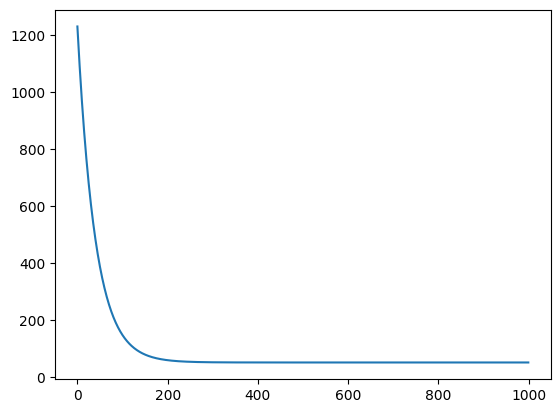

In [15]:
plt.plot(range(1000), cost_history)
plt.show()

In [16]:
def coeff_determination(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

In [17]:
coeff_determination(y, predictions)

0.9594219844220091